## Observations and Insights 

•	A total of 249 mice identified with SCC tumor growth were treated through 10 different drug regimens. The subjects were equally distributed among the 10 different drug regimes, except for Stelasyn regimen, having only had 9 subjects rather than 10.

•	The original data contains 5 duplicate rows for subject ID g989, the corresponding rows were removed, and a clean Data Frame was created

•	From the Summary Statistics Data Frame, we can observe that the mean and median of the subject’s tumor volume per drug regimen are fairly close to each other, therefore we can conclude that the data set per drug regimen has a symmetrical distribution. Also, the standard deviation of the subject’s tumor volume per drug regimen is a small number compared to the respective mean, which is an indicator that the subjects’ tumor volume in each drug regimen are close to their respective mean.

•	The Standard Error of Sample Mean is small in general in all drug regimen; therefore, the sample mean of the tumor volume of subjects is close to the population mean.

•	The sex of the subjects in the sample were 49.80% female and 50.20% male

•	Treatments Capomulin, Ramicane, and Ceftamin do not present outliers, however Infubinol has one outlier: mouse ID c326 with 36.32 (mm3) tumor volume

•	Capomulin and Ramicane seem to be more effective treatments than Ceftamin and Infubinol, in general the Final Tumor Volumes of the subjects are smaller

•	There is a positive strong correlation of 0.8419 between mouse weight and average tumor volume for the Capomulin regime, the more a mouse weights the bigger the tumor volume

•	The linear regression model between mouse weight and average tumor volume for the Capomulin treatment is y=0.95x+21.55


In [15]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
mouse_study_df=pd.merge(mouse_metadata,study_results, on='Mouse ID', how='outer')

# Display the data table for preview
mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [16]:
# Checking the number of mice.

len(mouse_study_df['Mouse ID'].value_counts())

249

In [17]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
909,g989,Propriva,Female,21,26,0,45.000000,0
911,g989,Propriva,Female,21,26,5,47.570392,0
913,g989,Propriva,Female,21,26,10,49.880528,0
915,g989,Propriva,Female,21,26,15,53.442020,0
917,g989,Propriva,Female,21,26,20,54.657650,1


In [18]:
# Optional: Get all the data for the duplicate mouse ID. 
duplicated_mouse_df=mouse_study_df[mouse_study_df.duplicated(subset=['Mouse ID','Timepoint'])]

In [19]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
clean_mouse_study_df=mouse_study_df.drop_duplicates(subset=['Mouse ID','Timepoint'])
clean_mouse_study_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [20]:
# Checking the number of mice in the clean DataFrame.
len(clean_mouse_study_df['Mouse ID'].value_counts())

249

In [21]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method produces everything in a single groupby function
# This method is the most straighforward, creating multiple series and putting them all together at the end
summary_df = clean_mouse_study_df.groupby('Drug Regimen').agg({'Tumor Volume (mm3)':['mean', 'median', 'var','std','sem']})
summary_df 

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.393463  50.909965  43.138803  6.568014  0.525862
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

x## Summary Statistics

## Bar and Pie Charts

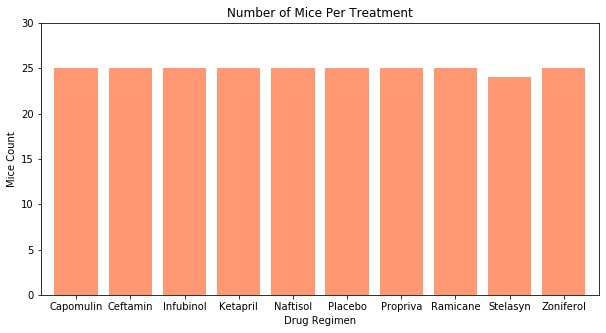

In [22]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

#create drug_regimen_count_df data frame with the count of mice per treatment
drug_regimen_count_df = clean_mouse_study_df.groupby('Drug Regimen').agg({'Mouse ID':'nunique'})

#plot a bar chart with the total number of mice for each treatment
mice_treatment_bar=drug_regimen_count_df.plot(kind='bar', title='Number of Mice Per Treatment', ylim=(0,30), legend=False, color='coral', alpha=0.8, width=0.8, figsize=(10,5), rot='horizontal')
mice_treatment_bar.set_ylabel('Mice Count')
plt.show()


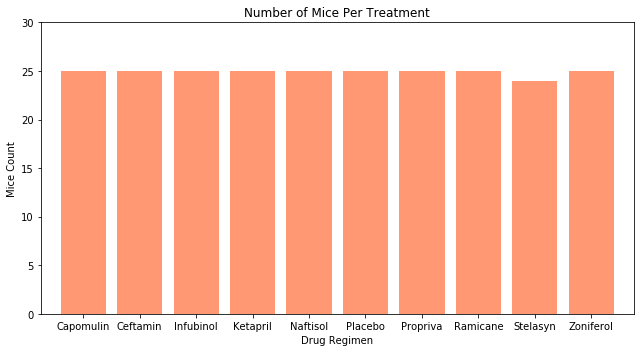

In [23]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

#create the series drugs and mice_count_perdrug to be used in the bar chart
drugs=drug_regimen_count_df.index
mice_count_perdrug=drug_regimen_count_df['Mouse ID']

plt.figure(figsize=(9,5))
plt.xlabel('Drug Regimen')
plt.ylabel('Mice Count')
plt.title('Number of Mice Per Treatment')
plt.xlim(-0.75,len(drugs)-0.25)
plt.ylim(0,max(mice_count_perdrug)+5)

#plot a bar chart with the total number of mice for each treatment
plt.bar(drugs,mice_count_perdrug, color='coral', align='center', alpha=0.8, width=0.8)
plt.tight_layout()
plt.show()

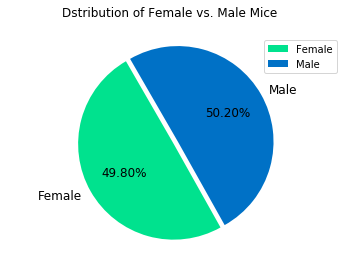

In [24]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

#create sex_count_df data frame with the count of Male and Female mice
sex_count_df=clean_mouse_study_df.groupby('Sex').agg({'Mouse ID':'nunique'})

colors=['#00E28E','#0071C6']
explode=[0.025,0.025]

#plot a pie chart with the the number of Male and Female mice
sex_count_df.plot(kind='pie',subplots=True,title='Dstribution of Female vs. Male Mice',autopct='%1.2f%%', fontsize=12, startangle=120,colors=colors, explode=explode)

plt.ylabel('')
plt.axis('equal')
plt.show()

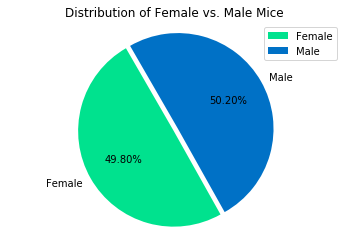

In [25]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot

#create the series sex and sex_countto be used in the pie chart
sex=list(sex_count_df.index)
sex_count=list(sex_count_df['Mouse ID'])

labels=['Female', 'Male']
colors=['#00E28E','#0071C6']
explode=[0.025,0.025]

plt.title('Distribution of Female vs. Male Mice')

#plot a pie chart with the the number of Male and Female mice
plt.pie(sex_count, labels=sex,autopct='%1.2f%%', startangle=120,colors=colors,explode=explode)

plt.legend()
plt.axis('equal')
plt.show()

## Quartiles, Outliers and Boxplots

In [26]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

#filter clean_mouse_study_df data frame, only with the following four treatments:Capomulin, Ramicane, Infubinol, and Ceftamin
treatment_timepoint_df=clean_mouse_study_df[(clean_mouse_study_df['Drug Regimen']=='Capomulin')|(clean_mouse_study_df['Drug Regimen']=='Ramicane')|(clean_mouse_study_df['Drug Regimen']=='Infubinol')|(clean_mouse_study_df['Drug Regimen']=='Ceftamin')]

#creae a series with the index of the row that hold the final tumor volume for each mouse under treatments:Capomulin, Ramicane, Infubinol, and Ceftamin
last_timepoint_index = treatment_timepoint_df.groupby(['Drug Regimen','Mouse ID'])['Timepoint'].idxmax().values

#create mouseID_tumor_df data frame with each mouse across four of the treatments(Capomulin, Ramicane, Infubinol, and Ceftamin) and the respective final tumor volume
mouseID_tumor_df=treatment_timepoint_df.loc[last_timepoint_index,['Mouse ID','Drug Regimen','Tumor Volume (mm3)']].reset_index(drop=True).set_index('Mouse ID')
mouseID_tumor_df


,Drug Regimen,Tumor Volume (mm3)
Mouse ID,,
b128,Capomulin,38.982878
b742,Capomulin,38.939633
f966,Capomulin,30.485985
g288,Capomulin,37.074024
g316,Capomulin,40.159220
...,...,...
s508,Ramicane,30.276232
u196,Ramicane,40.667713
w678,Ramicane,43.166373


In [27]:
# Put treatments into a list 
treatments=list(mouseID_tumor_df['Drug Regimen'].unique())

# Create empty list to fill with tumor vol data 
tumor_volume=[]

#iterate through each treatment in treatments list 
for treatment in treatments:
    
    #create a series with the tumor volume of each mouse in the specific treatment
    tumor_volume=mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']==treatment]['Tumor Volume (mm3)']
    
    #calculate the IQR, lower bound and upper bound of the specific treatment
    quartiles=tumor_volume.quantile([.25,.5,.75])
    lowerq=quartiles[.25]
    upperq=quartiles[.75]
    iqr=upperq-lowerq
    lower_bound=quartiles[.25]-(1.5*iqr)
    upper_bound=quartiles[.75]+(1.5*iqr)
    
    #determine if there are any potential outliers 
    outliers=list(tumor_volume[(tumor_volume < lower_bound)|(tumor_volume>upper_bound)])
    
    if len(outliers)==0:
        print(f'{treatment} treatment does not have outliers')
    else:
        print(f'{treatment} treatment has {len(outliers)} outlier(s) with tumor volume: {list(outliers)} (mm3)')
        

Capomulin treatment does not have outliers
Ceftamin treatment does not have outliers
Infubinol treatment has 1 outlier(s) with tumor volume: [36.321345799999996] (mm3)
Ramicane treatment does not have outliers


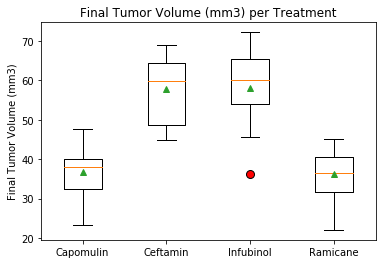

In [28]:
#create series with the final tumor volume of each mouse across four regimens of interest
capomulin_tumor_vol=list(mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']=='Capomulin']['Tumor Volume (mm3)'])
ceftamin_tumor_vol=mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']=='Ceftamin']['Tumor Volume (mm3)']
infubinol_tumor_vol=mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']=='Infubinol']['Tumor Volume (mm3)']
ramicane_tumor_vol=mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']=='Ramicane']['Tumor Volume (mm3)']

#setting ourlier style
flierprops = dict(marker='o',markerfacecolor='red', markersize=8)
#generate a box plot
fig1, ax1 = plt.subplots()
ax1.boxplot([capomulin_tumor_vol,ceftamin_tumor_vol,infubinol_tumor_vol,ramicane_tumor_vol], showmeans=True, flierprops=flierprops)

ax1.set_title('Final Tumor Volume (mm3) per Treatment')
ax1.set_ylabel('Final Tumor Volume (mm3)')
plt.xticks([1,2,3,4],['Capomulin','Ceftamin','Infubinol','Ramicane'])

plt.show()


## Line and Scatter Plots

Enter the mouse ID of the mouse you want to look at: s185


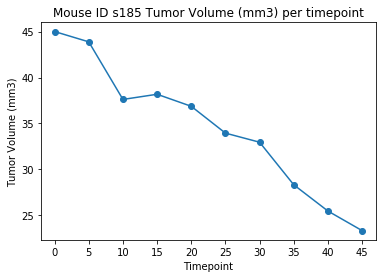

In [33]:
#list with the ID of mice treated with Capomulin
mouse_list=list(mouseID_tumor_df[mouseID_tumor_df['Drug Regimen']=='Capomulin'].index)

#get the input of the mouse ID
mouse_id=input('Enter the mouse ID of the mouse you want to look at: ')

#check if the mouse ID is in the mouse list
if mouse_id in mouse_list:
    
    #create data frame with the timepoint and tumor volume of the mouse ID entered
    tumor_volume_timepoint=(clean_mouse_study_df[(clean_mouse_study_df['Mouse ID']==mouse_id)&(clean_mouse_study_df['Drug Regimen']=='Capomulin')][['Timepoint', 'Tumor Volume (mm3)']]).reset_index(drop=True).set_index('Timepoint')

    #create series with the Timepoint and Tumor Volume (mm3) of mouse ID entered
    x_values=tumor_volume_timepoint.index
    y_values=tumor_volume_timepoint['Tumor Volume (mm3)']

    plt.title(f'Mouse ID {mouse_id} Tumor Volume (mm3) per timepoint')
    plt.xlabel('Timepoint')
    plt.ylabel('Tumor Volume (mm3)')
    plt.xlim(min(x_values)-2,max(x_values)+2)
    plt.ylim(min(y_values)-1,max(y_values)+1)

    #generate a line plot for mouse ID entered
    plt.plot(x_values,y_values,marker='o')
    plt.xticks(x_values)
    plt.show()
else:
    print('The ID of the mouse you entered was not treated with Capomulin or is not an Id, try again')

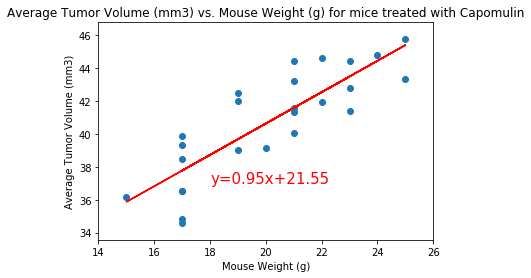

In [34]:
#create capomulin_avg_tumor_volume data frame with mouse ID as index, average tumor volume and weight 
capomulin_avg_tumor_volume=clean_mouse_study_df.groupby(['Drug Regimen','Mouse ID']).agg({'Tumor Volume (mm3)':'mean','Weight (g)':'mean' }).loc['Capomulin',:]

#create series with Weight (g) and Average Tumor Volume (mm3)
x_values=capomulin_avg_tumor_volume['Weight (g)']
y_values=capomulin_avg_tumor_volume['Tumor Volume (mm3)']

#least-square regresion line
(slope, intercept,rvalue, pvalue, stderr)=st.linregress(x_values,y_values)
regress_value=x_values*slope+intercept
line_eq='y='+str(round(slope,2))+'x+'+str(round(intercept,2))

plt.scatter(x_values,y_values)


plt.title('Average Tumor Volume (mm3) vs. Mouse Weight (g) for mice treated with Capomulin')
plt.xlabel('Mouse Weight (g)')
plt.ylabel('Average Tumor Volume (mm3)')
plt.xlim(min(x_values)-1,max(x_values)+1)
plt.ylim(min(y_values)-1,max(y_values)+1)

plt.annotate(line_eq,(18,37), fontsize=15, color='r')
plt.plot(x_values,regress_value,'r-' )
plt.show()


## Correlation and Regression

In [31]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

correlation=capomulin_avg_tumor_volume['Tumor Volume (mm3)'].corr(capomulin_avg_tumor_volume['Weight (g)'])
print(f'The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is: {round(correlation,4)}')
print(f'The linear regression model between mouse weight and average tumor volume for the Capomulin treatment is: {line_eq} ')

The correlation coefficient between mouse weight and average tumor volume for the Capomulin treatment is: 0.8419
The linear regression model between mouse weight and average tumor volume for the Capomulin treatment is: y=0.95x+21.55 
